In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, RocCurveDisplay
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import pickle

In [2]:
df = pd.read_csv('league_data.csv')

In [3]:
df

,blue_average_level,blue_total_gold,blue_totalDamageDoneToChampions,blue_totalDamageDone,blue_minionsKilled,blue_timeEnemySpentControlled,blue_jungleMinionsKilled,blue_currentGold,blue_first_blood,blue_champions_killed,...,red_total_gold,red_totalDamageDoneToChampions,red_totalDamageDone,red_minionsKilled,red_timeEnemySpentControlled,red_jungleMinionsKilled,red_currentGold,red_first_blood,red_champions_killed,blue_win
0,11.2,39882,55612,123124,107,810574,0,2667,1,32,...,39457,51575,114873,94,242770,0,3907,0,28,0
1,11.2,38016,55485,118283,103,459175,0,3491,1,26,...,34854,46479,101181,82,463526,0,2944,0,20,0
2,11.4,37813,53146,120978,110,477797,0,7113,0,26,...,35742,41846,108435,126,533124,0,1892,1,21,0
3,6.8,16418,15996,116309,203,197187,66,3918,0,6,...,21354,18708,156906,184,316942,75,3984,1,16,1
4,7.2,20480,20826,150130,225,264053,64,3640,1,15,...,16415,14275,112602,214,1138302,44,1625,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,6.6,15432,13701,132001,224,527674,56,3887,1,2,...,16538,13753,132255,233,377511,52,3313,0,5,0
1961,6.8,16792,12438,131264,252,329499,56,4202,1,6,...,15852,12894,146578,237,490171,60,4152,0,2,0
1962,7.0,19368,17575,137518,225,353445,44,6233,1,10,...,14010,15316,94263,163,314618,44,1185,0,3,1
1963,11.0,38460,46568,104397,81,446357,0,2285,1,28,...,38525,43529,110417,101,328971,0,4990,0,27,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965 entries, 0 to 1964
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   blue_average_level               1965 non-null   float64
 1   blue_total_gold                  1965 non-null   int64  
 2   blue_totalDamageDoneToChampions  1965 non-null   int64  
 3   blue_totalDamageDone             1965 non-null   int64  
 4   blue_minionsKilled               1965 non-null   int64  
 5   blue_timeEnemySpentControlled    1965 non-null   int64  
 6   blue_jungleMinionsKilled         1965 non-null   int64  
 7   blue_currentGold                 1965 non-null   int64  
 8   blue_first_blood                 1965 non-null   int64  
 9   blue_champions_killed            1965 non-null   int64  
 10  red_average_level                1965 non-null   float64
 11  red_total_gold                   1965 non-null   int64  
 12  red_totalDamageDoneT

In [5]:
df.describe()

,blue_average_level,blue_total_gold,blue_totalDamageDoneToChampions,blue_totalDamageDone,blue_minionsKilled,blue_timeEnemySpentControlled,blue_jungleMinionsKilled,blue_currentGold,blue_first_blood,blue_champions_killed,...,red_total_gold,red_totalDamageDoneToChampions,red_totalDamageDone,red_minionsKilled,red_timeEnemySpentControlled,red_jungleMinionsKilled,red_currentGold,red_first_blood,red_champions_killed,blue_win
count,1965.000000,1965.000000,1965.000000,1965.00000,1965.000000,1.965000e+03,1965.000000,1965.000000,1965.000000,1965.000000,...,1965.000000,1965.000000,1965.000000,1965.000000,1.965000e+03,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000
mean,7.266260,19063.065649,17948.731807,129813.29771,203.970992,3.907957e+05,47.758270,3220.991858,0.517048,8.627481,...,18980.467684,17767.105852,129822.482443,204.508906,3.835996e+05,47.912977,3287.313995,0.474300,8.603562,0.517557
std,1.338642,6810.874944,11082.494450,25210.37820,39.492796,1.868621e+05,17.719157,1338.332692,0.499836,6.710455,...,6865.606432,11091.073348,26053.412051,40.473490,1.962646e+05,17.535999,1349.707314,0.499466,6.694306,0.499819
min,1.000000,2500.000000,0.000000,33.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,2500.000000,0.000000,72.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.800000,15929.000000,12780.000000,117992.00000,193.000000,2.734780e+05,44.000000,2303.000000,0.000000,5.000000,...,15841.000000,12480.000000,116949.000000,194.000000,2.627470e+05,44.000000,2379.000000,0.000000,5.000000,0.000000
50%,7.000000,17134.000000,14944.000000,128252.00000,212.000000,3.576560e+05,52.000000,3039.000000,1.000000,7.000000,...,17070.000000,14855.000000,128240.000000,212.000000,3.500020e+05,52.000000,3122.000000,0.000000,7.000000,1.000000
75%,7.200000,18603.000000,17507.000000,138760.00000,228.000000,4.646380e+05,59.000000,4005.000000,1.000000,10.000000,...,18483.000000,17453.000000,140435.000000,228.000000,4.505330e+05,59.000000,4059.000000,1.000000,10.000000,1.000000
max,12.000000,49394.000000,80913.000000,273609.00000,287.000000,1.433723e+06,112.000000,11074.000000,1.000000,41.000000,...,50709.000000,90131.000000,267074.000000,280.000000,2.934767e+06,84.000000,11801.000000,1.000000,50.000000,1.000000


In [6]:
df['blue_win'].value_counts()/df['blue_win'].count() * 100

1    51.755725
0    48.244275
Name: blue_win, dtype: float64

In [7]:
df['blue_win'].count()

1965

In [8]:
df['blue_first_blood'].value_counts()/df['blue_first_blood'].count()

1    0.517048
0    0.482952
Name: blue_first_blood, dtype: float64

In [9]:
df['gold_difference'] = df['blue_total_gold'] - df['red_total_gold']
df['totalDamageDoneToChampions'] = df['blue_totalDamageDoneToChampions'] - df['red_totalDamageDoneToChampions']
df['totalDamageDone'] = df['blue_totalDamageDone'] - df['red_totalDamageDone']
df['timeEnemySpentControlled'] = df['blue_timeEnemySpentControlled'] - df['red_timeEnemySpentControlled']
df['minionsKilled'] = df['blue_minionsKilled'] - df['red_minionsKilled'] 
df['average_level'] = df['blue_average_level'] - df['red_average_level']
df['jungleMinionsKilled'] = df['blue_jungleMinionsKilled'] - df['red_jungleMinionsKilled']
df['current_gold'] = df['blue_currentGold'] - df['red_currentGold']
df['diff_champions_killed'] = df['red_champions_killed'] - df['blue_champions_killed']
df.drop(['blue_total_gold', 'red_total_gold', 'blue_totalDamageDoneToChampions', 'red_totalDamageDoneToChampions', 'blue_totalDamageDone', 'red_totalDamageDone', 'blue_timeEnemySpentControlled', 'red_timeEnemySpentControlled', 'blue_minionsKilled', 'red_minionsKilled', 'blue_average_level', 'red_average_level', 'blue_jungleMinionsKilled', 'red_jungleMinionsKilled', 'red_currentGold', 'blue_currentGold', 'red_first_blood', 'blue_champions_killed', 'red_champions_killed'], axis=1, inplace = True)

In [10]:
y = df['blue_win']
X = df.drop(['blue_win'], axis = 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5) 

In [12]:
data = X_train.join(y_train)

In [13]:
data

,blue_first_blood,gold_difference,totalDamageDoneToChampions,totalDamageDone,timeEnemySpentControlled,minionsKilled,average_level,jungleMinionsKilled,current_gold,diff_champions_killed,blue_win
1539,1,-5088,-4670,-45103,175782,-21,-1.0,-28,-3488,9,1
1411,1,-56,-3015,-15071,143620,1,-0.4,-16,-6,-1,1
772,0,-2596,-4421,-28370,309771,-39,-0.6,-20,-386,5,1
1283,0,665,-2182,40350,126665,14,0.2,35,-1925,0,1
857,1,3828,10890,6249,55540,27,0.4,-20,2733,-6,0
...,...,...,...,...,...,...,...,...,...,...,...
1142,0,-971,-5338,-20057,-166952,28,0.0,-32,-3826,-1,1
998,1,2992,2408,3293,-437045,53,0.4,0,522,-4,0
1725,1,-459,-423,6250,-259375,0,0.0,1,1296,2,0
206,1,1542,3006,6643,-367608,35,0.4,-5,1432,0,0


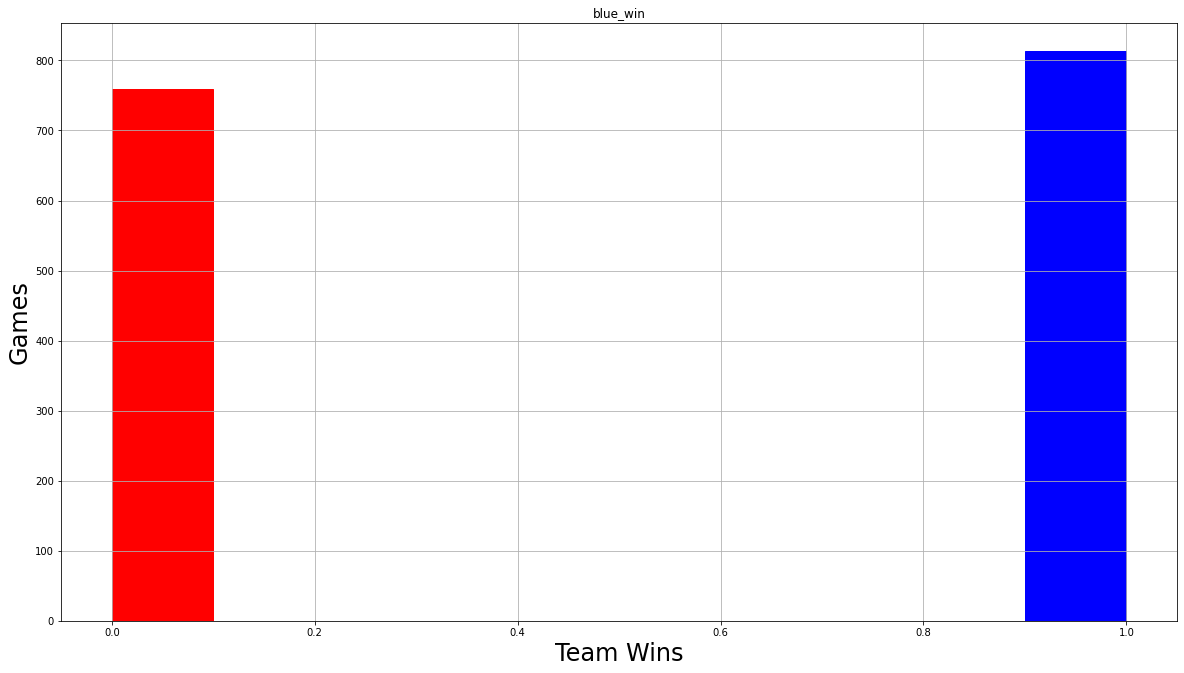

In [14]:
axarr = data.hist(column = 'blue_win', figsize = (20, 11))
for ax in axarr.flatten():
    ax.set_xlabel("Team Wins", fontsize = 24)
    ax.set_ylabel("Games", fontsize = 24)
for bar in ax.containers[0]:
    # get x midpoint of bar
    x = bar.get_x() + 0.5 * bar.get_width()
    if x > 0.5:
        bar.set_color('blue')
    else:
        bar.set_color('red')

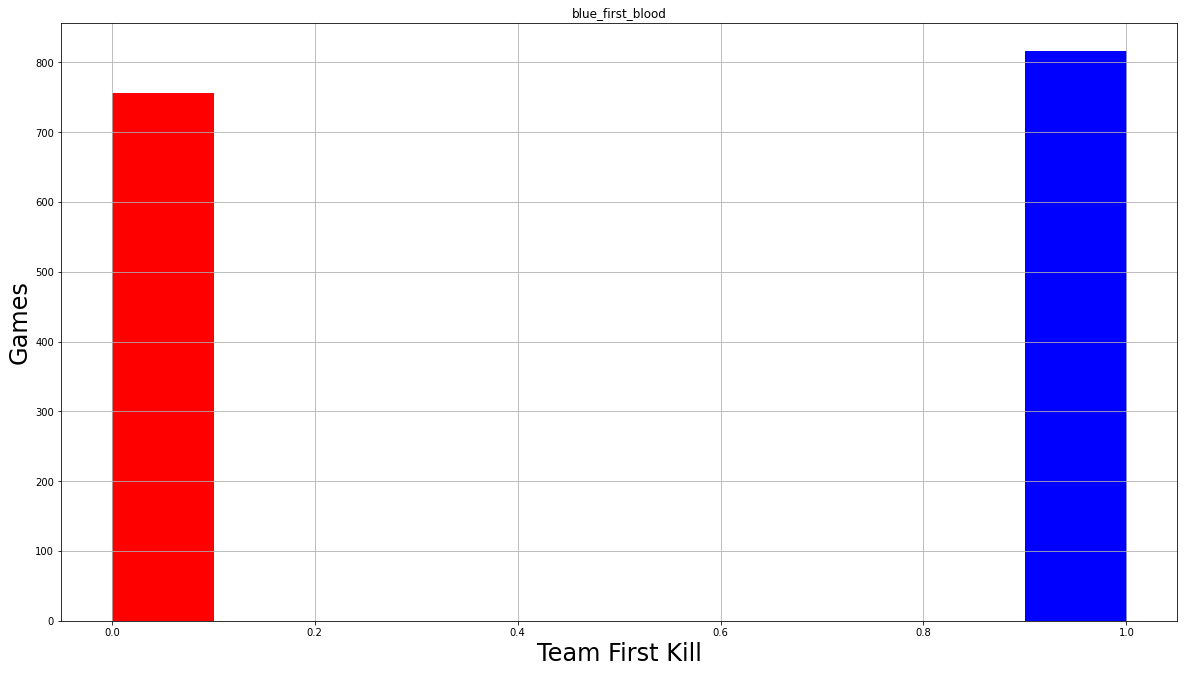

In [15]:
axarr = data.hist(column = 'blue_first_blood', figsize = (20, 11))
for ax in axarr.flatten():
    ax.set_xlabel("Team First Kill", fontsize = 24)
    ax.set_ylabel("Games", fontsize = 24)
for bar in ax.containers[0]:
    # get x midpoint of bar
    x = bar.get_x() + 0.5 * bar.get_width()
    if x > 0.5:
        bar.set_color('blue')
    else:
        bar.set_color('red')

array([[<AxesSubplot: title={'center': 'blue_first_blood'}>,
        <AxesSubplot: title={'center': 'gold_difference'}>,
        <AxesSubplot: title={'center': 'totalDamageDoneToChampions'}>],
       [<AxesSubplot: title={'center': 'totalDamageDone'}>,
        <AxesSubplot: title={'center': 'timeEnemySpentControlled'}>,
        <AxesSubplot: title={'center': 'minionsKilled'}>],
       [<AxesSubplot: title={'center': 'average_level'}>,
        <AxesSubplot: title={'center': 'jungleMinionsKilled'}>,
        <AxesSubplot: title={'center': 'current_gold'}>],
       [<AxesSubplot: title={'center': 'diff_champions_killed'}>,
        <AxesSubplot: title={'center': 'blue_win'}>, <AxesSubplot: >]],
      dtype=object)

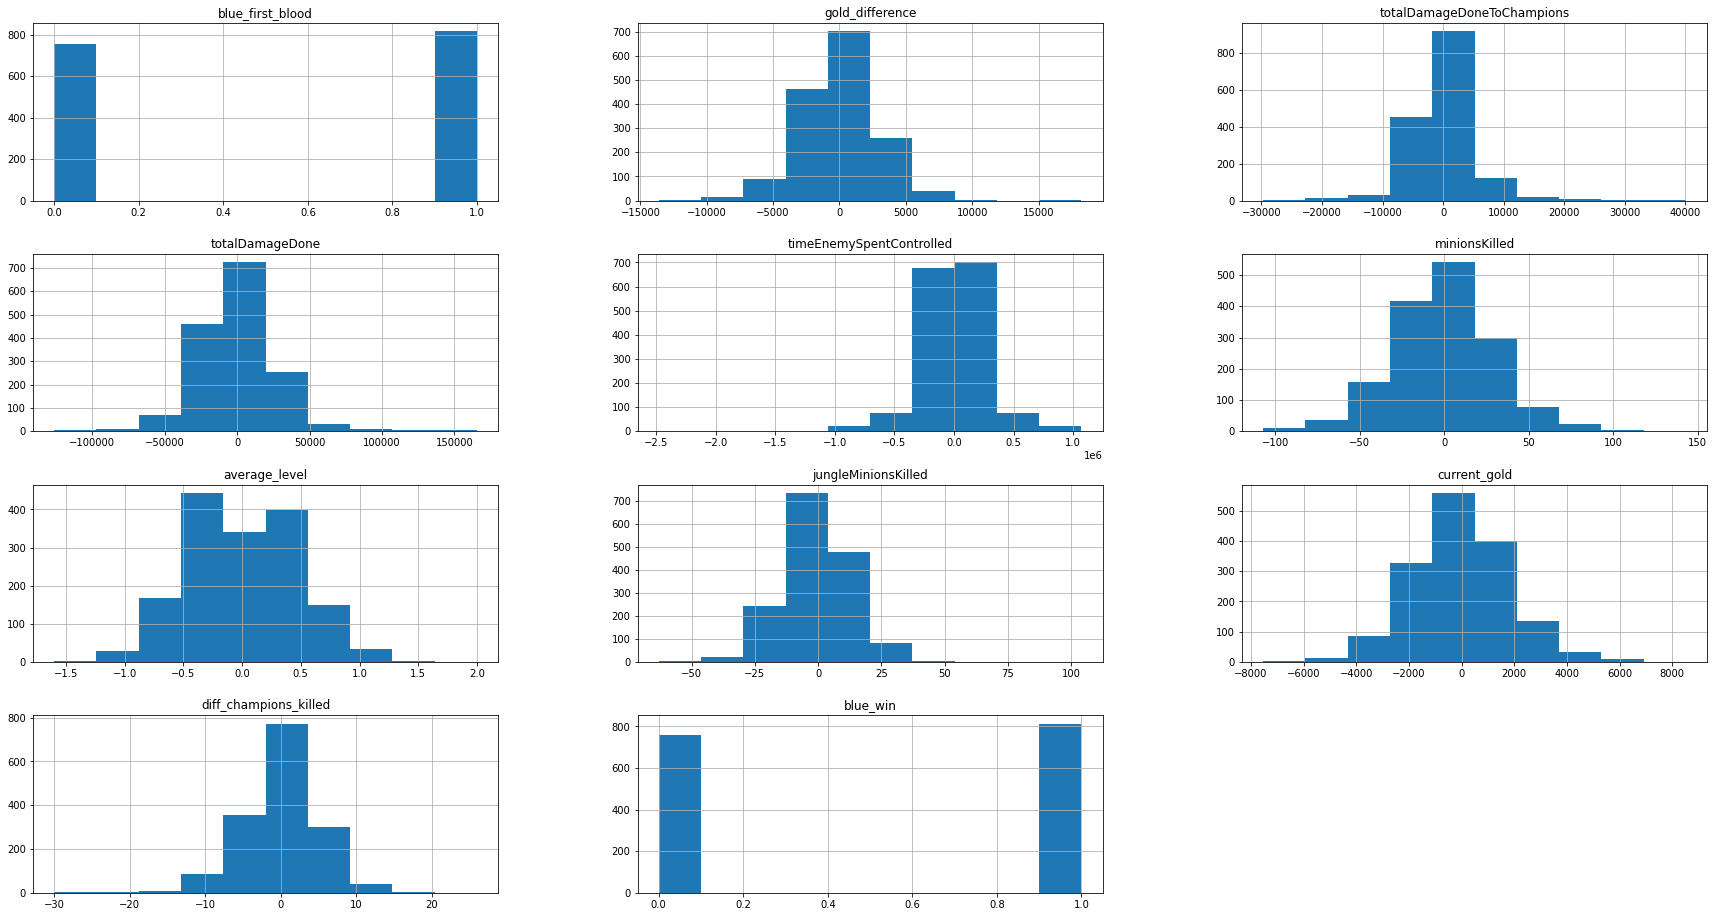

In [16]:
data.hist(figsize = (30, 16))

<AxesSubplot: >

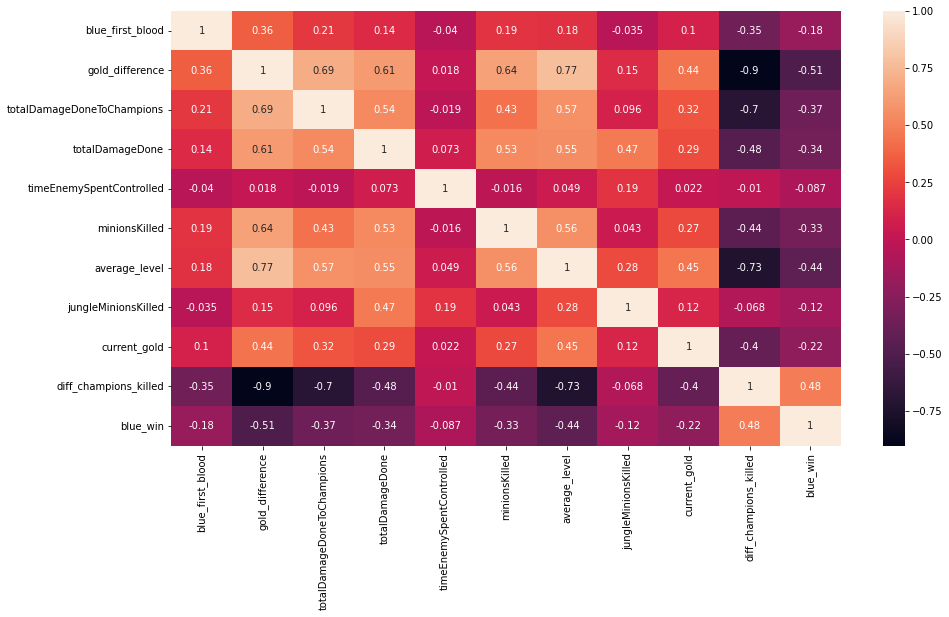

In [17]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot = True)

In [18]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [20]:
y_pred = lr.predict(X_test)


Accuracy Score: 0.7099236641221374
Recall:
 71.57%
Precision:
 72.28%
F1:
 71.92324782759819


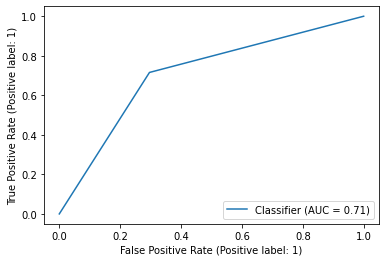

In [21]:
lr_acc = accuracy_score(y_test, y_pred)
recall = round((recall_score(y_test, y_pred)*100),2)
precision = round((precision_score(y_test, y_pred)*100),2)
print(f'Accuracy Score: {lr_acc}')
print(f'Recall:\n {recall}%')
print(f'Precision:\n {precision}%')
print(f'F1:\n {(2*precision*recall)/(precision+recall)}')

RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

In [22]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

Accuracy Score: 0.6997455470737913
Recall:
 68.63%
Precision:
 72.16%
F1:
 70.35074650188223


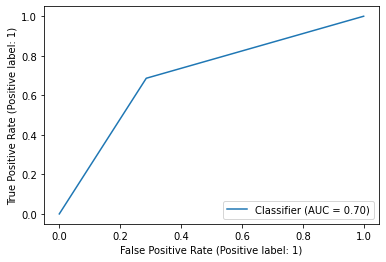

In [23]:
rf_y_pred = rf.predict(X_test)
model_acc = accuracy_score(y_test, rf_y_pred)
recall = round((recall_score(y_test, rf_y_pred)*100),2)
precision = round((precision_score(y_test, rf_y_pred)*100),2)
print(f'Accuracy Score: {model_acc}')
print(f'Recall:\n {recall}%')
print(f'Precision:\n {precision}%')
print(f'F1:\n {(2*precision*recall)/(precision+recall)}')

RocCurveDisplay.from_predictions(y_test, rf_y_pred)
plt.show()

In [24]:
neigh = KNeighborsClassifier()

In [25]:
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
neigh_y_pred = neigh.predict(X_test)
neigh_acc = accuracy_score(y_test, neigh_y_pred)
recall = round((recall_score(y_test, neigh_y_pred)*100),2)
precision = round((precision_score(y_test, neigh_y_pred)*100),2)
print(f'Accuracy Score: {neigh_acc}')
print(f'Recall:\n {recall}%')
print(f'Precision:\n {precision}%')
print(f'F1:\n {(2*precision*recall)/(precision+recall)}')

Accuracy Score: 0.6717557251908397
Recall:
 70.1%
Precision:
 67.77%
F1:
 68.91531152534996


In [27]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

In [40]:
clf_pred = clf.predict(X_test)
clf_acc = accuracy_score(y_test, clf_pred)
recall = round((recall_score(y_test, clf_pred)*100),2)
precision = round((precision_score(y_test, clf_pred)*100),2)
print(f'Accuracy Score: {clf_acc}')
print(f'Recall:\n {recall}%')
print(f'Precision:\n {precision}%')
print(f'F1:\n {(2*precision*recall)/(precision+recall)}')

Accuracy Score: 0.6844783715012722
Recall:
 71.57%
Precision:
 68.87%
F1:
 70.19404585588151


In [29]:
# hyper parameters for logistic, has worse accuracy
# params = {
#     'penalty': ['none', 'l1', 'l2', 'elasticnet'],
#     'C' : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
#     'solver' : ['newton-cg', 'lbfgs', 'liblinear']
# }

In [43]:
params = {
    "max_depth": [3,4,5,7,8,9],
    "criterion": ['gini', 'entropy', 'log_loss'],
    "min_samples_split": [2,3,4,5],
    "min_samples_leaf": [1,3,5,7],
    "min_weight_fraction_leaf": [0],
    "n_jobs": [None, 1, 2, 3],
    "random_state": [5]
}
grid = GridSearchCV(rf, params)
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 7, 8, 9],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0],
                         'n_jobs': [None, 1, 2, 3], 'random_state': [5]})

In [46]:
best_forest = grid.best_estimator_

In [47]:
print(best_forest)

RandomForestClassifier(criterion='entropy', max_depth=7,
                       min_weight_fraction_leaf=0, random_state=5)


In [45]:
best_forest.score(X_test, y_test)

0.7150127226463104

<BarContainer object of 10 artists>

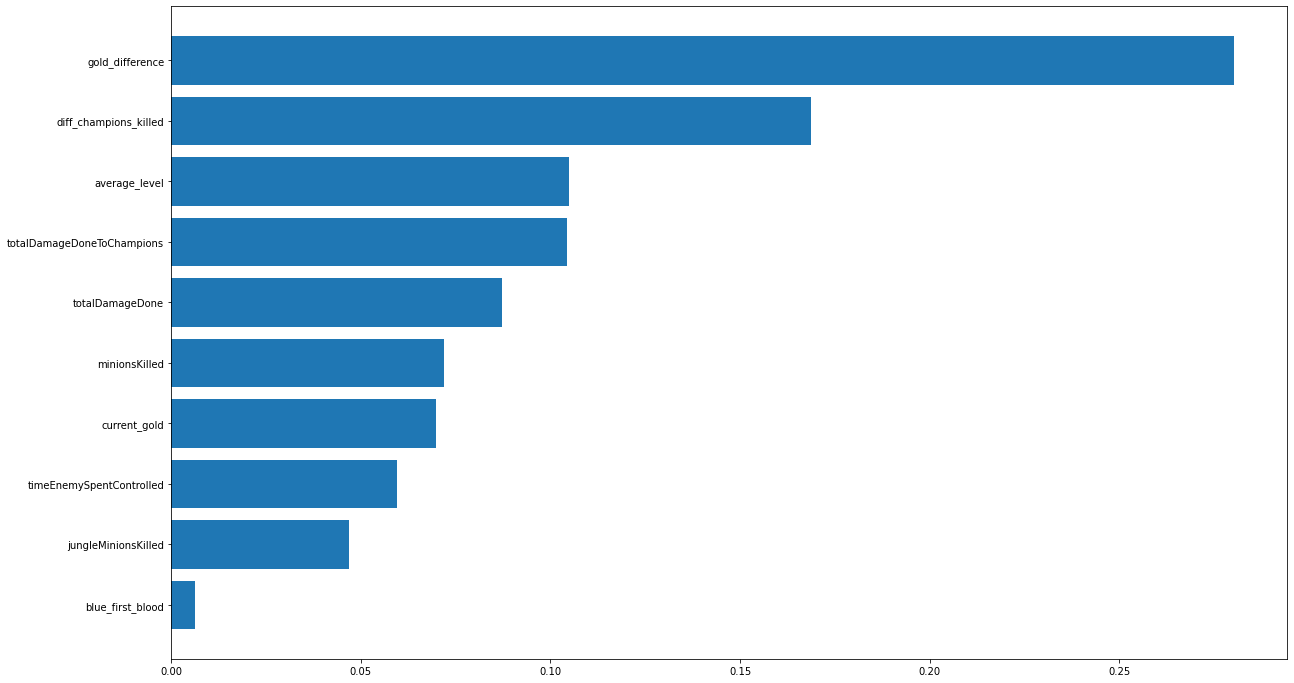

In [48]:
best_features = grid.best_estimator_.feature_importances_.argsort()
plt.rcParams["figure.figsize"] = (20,12)
plt.barh(X.columns[best_features], grid.best_estimator_.feature_importances_[best_features])

In [49]:
print(best_forest)

RandomForestClassifier(criterion='entropy', max_depth=7,
                       min_weight_fraction_leaf=0, random_state=5)
